In [2]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 14.2 MB/s eta 0:00:0000:0100:01


In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from collections import Counter
import glob
from tqdm.notebook import tqdm
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, Image as IPImage


===== EDA for class: Cat =====
Total number of images: 1498

Image format distribution:
  .jpg: 510 images (34.0%)
  .jpeg: 978 images (65.3%)
  .png: 10 images (0.7%)

File size statistics (KB):
  Min size: 23.06
  Max size: 4821.51
  Average size: 1275.70
  Median size: 1174.12


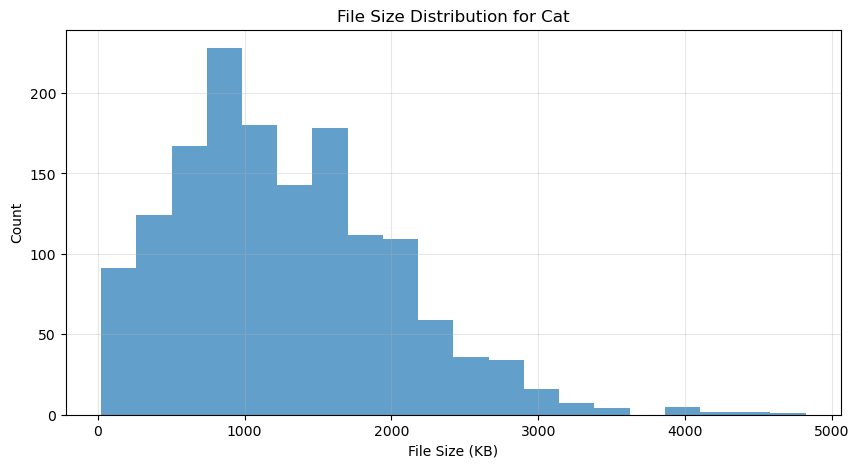


Analyzing image dimensions...


  0%|          | 0/500 [00:00<?, ?it/s]


Image dimension statistics:
  Width - Min: 314, Max: 2048, Average: 1595.9
  Height - Min: 370, Max: 2048, Average: 1717.2
  Aspect ratio - Min: 0.45, Max: 2.16, Average: 0.99


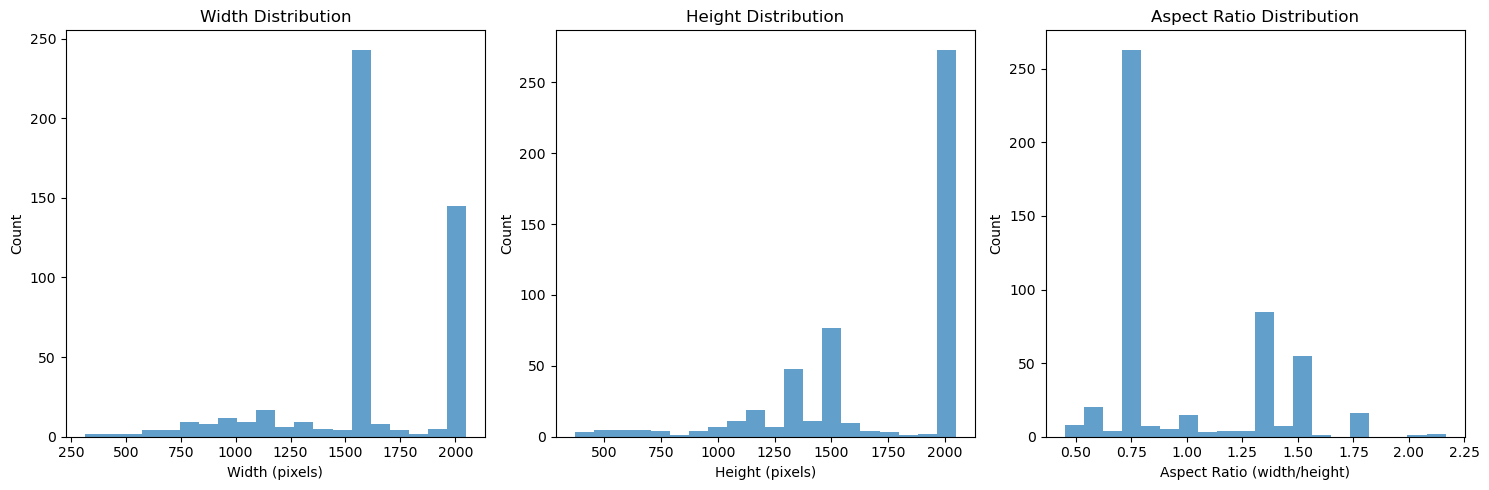

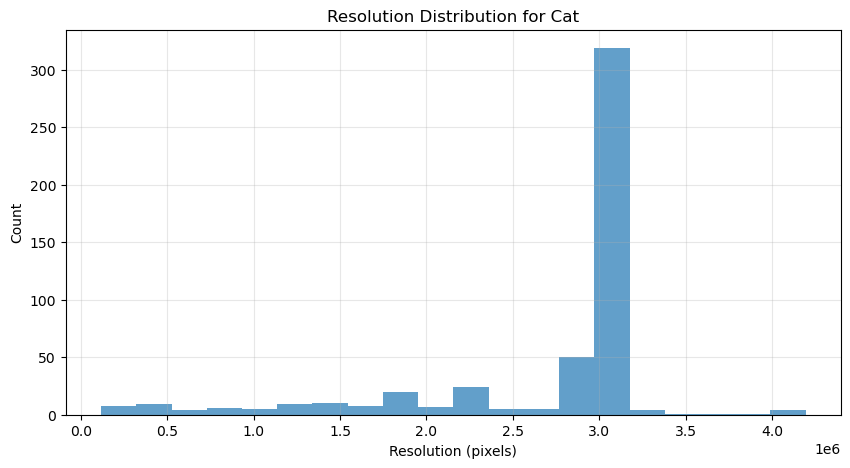

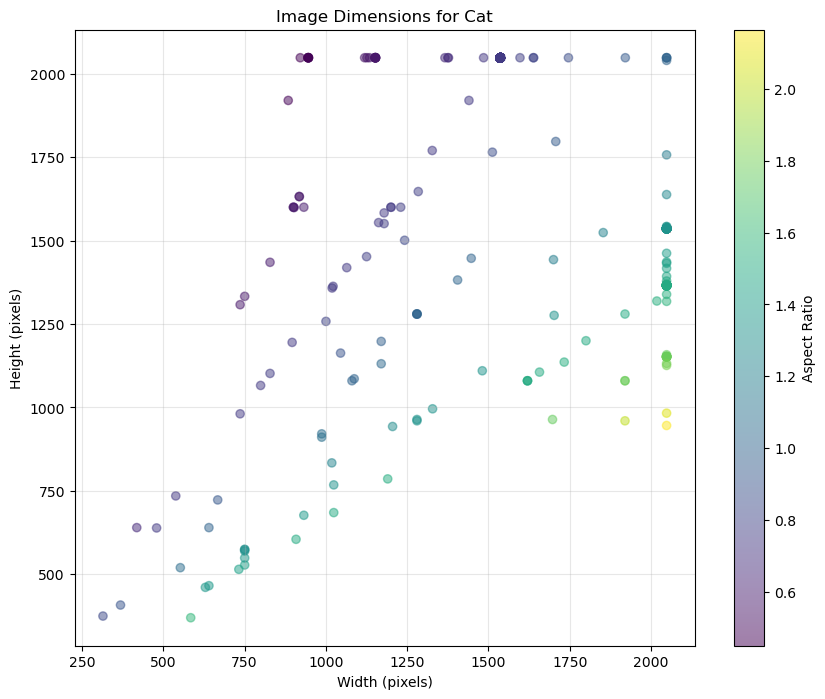


Analyzing color channels...


  0%|          | 0/100 [00:00<?, ?it/s]


Color analysis (based on 100 images):
  Grayscale images: 1 (1.0%)

Average color channel statistics:
  Red - Mean: 123.4, Std: 53.9
  Green - Mean: 117.9, Std: 52.8
  Blue - Mean: 105.6, Std: 52.0


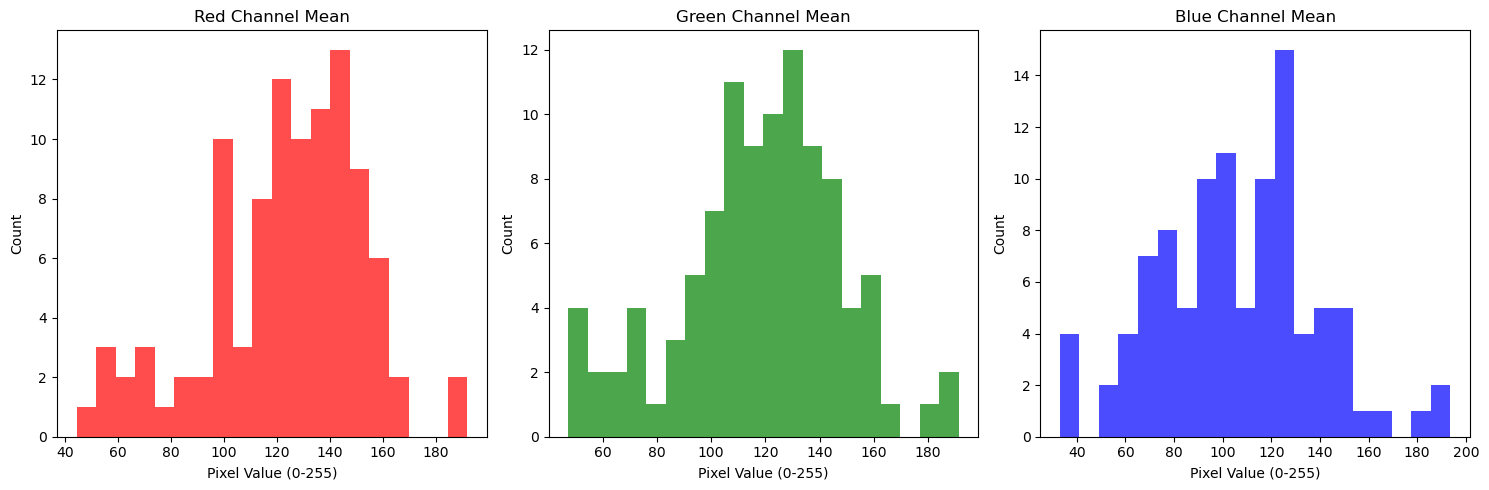


Displaying sample images:


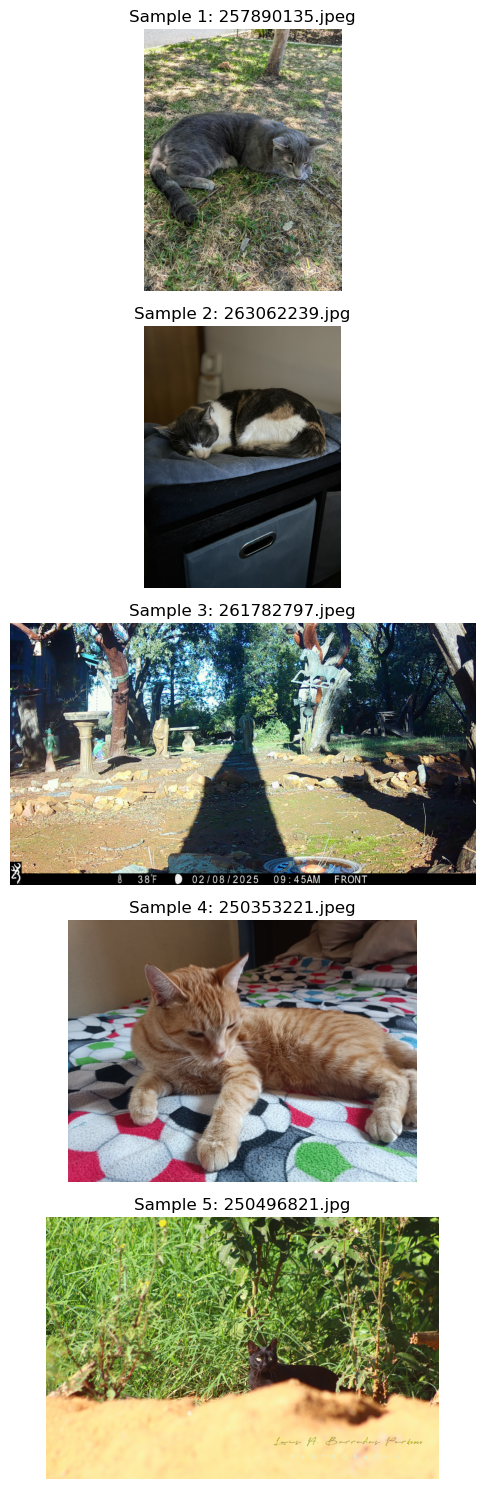


===== Summary for class: Cat =====
Total images: 1498
Most common dimensions: 1536x2048 pixels
Median aspect ratio: 0.75
Median file size: 1174.12 KB
Average RGB values: [123.4, 117.9, 105.6]




In [24]:
def perform_eda_for_class(class_folder_path):
    
    # Extract class name from the folder path
    class_name = os.path.basename(os.path.normpath(class_folder_path))
    
    print(f"===== EDA for class: {class_name} =====")
    
    # Basic information about the dataset
    image_files = []
    valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
    
    for ext in valid_extensions:
        image_files.extend(glob.glob(os.path.join(class_folder_path, f'*{ext}')))
        image_files.extend(glob.glob(os.path.join(class_folder_path, f'*{ext.upper()}')))
    
    print(f"Total number of images: {len(image_files)}")
    
    if len(image_files) == 0:
        print("No images found in the directory.")
        return
    
    # Image file extensions analysis
    extensions = [os.path.splitext(f)[1].lower() for f in image_files]
    ext_counts = Counter(extensions)
    
    print("\nImage format distribution:")
    for ext, count in ext_counts.items():
        print(f"  {ext}: {count} images ({count/len(image_files)*100:.1f}%)")
    
    # Analyze file sizes
    file_sizes = [os.path.getsize(f) / 1024 for f in image_files]  # KB
    
    print("\nFile size statistics (KB):")
    print(f"  Min size: {min(file_sizes):.2f}")
    print(f"  Max size: {max(file_sizes):.2f}")
    print(f"  Average size: {np.mean(file_sizes):.2f}")
    print(f"  Median size: {np.median(file_sizes):.2f}")
    
    plt.figure(figsize=(10, 5))
    plt.hist(file_sizes, bins=20, alpha=0.7)
    plt.title(f'File Size Distribution for {class_name}')
    plt.xlabel('File Size (KB)')
    plt.ylabel('Count')
    plt.grid(alpha=0.3)
    plt.show()
    
    # Image dimensions analysis
    widths = []
    heights = []
    aspect_ratios = []
    
    print("\nAnalyzing image dimensions...")
    for img_path in tqdm(image_files[:min(len(image_files), 500)]):  # Limit to 500 images for speed
        try:
            img = Image.open(img_path)
            w, h = img.size
            widths.append(w)
            heights.append(h)
            aspect_ratios.append(w / h)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
    
    print("\nImage dimension statistics:")
    print(f"  Width - Min: {min(widths)}, Max: {max(widths)}, Average: {np.mean(widths):.1f}")
    print(f"  Height - Min: {min(heights)}, Max: {max(heights)}, Average: {np.mean(heights):.1f}")
    print(f"  Aspect ratio - Min: {min(aspect_ratios):.2f}, Max: {max(aspect_ratios):.2f}, Average: {np.mean(aspect_ratios):.2f}")
    
    # Visualize dimensions
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.hist(widths, bins=20, alpha=0.7)
    plt.title('Width Distribution')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Count')
    
    plt.subplot(1, 3, 2)
    plt.hist(heights, bins=20, alpha=0.7)
    plt.title('Height Distribution')
    plt.xlabel('Height (pixels)')
    plt.ylabel('Count')
    
    plt.subplot(1, 3, 3)
    plt.hist(aspect_ratios, bins=20, alpha=0.7)
    plt.title('Aspect Ratio Distribution')
    plt.xlabel('Aspect Ratio (width/height)')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()
    
    # Image resolution analysis
    resolutions = [w * h for w, h in zip(widths, heights)]
    
    plt.figure(figsize=(10, 5))
    plt.hist(resolutions, bins=20, alpha=0.7)
    plt.title(f'Resolution Distribution for {class_name}')
    plt.xlabel('Resolution (pixels)')
    plt.ylabel('Count')
    plt.grid(alpha=0.3)
    plt.show()
    
    # Create scatter plot of dimensions
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(widths, heights, alpha=0.5, c=aspect_ratios, cmap='viridis')
    plt.colorbar(scatter, label='Aspect Ratio')
    plt.title(f'Image Dimensions for {class_name}')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Height (pixels)')
    plt.grid(alpha=0.3)
    plt.show()
    
    # Analyze color channels
    print("\nAnalyzing color channels...")
    
    # Sample a subset of images for color analysis (up to 100)
    sample_size = min(100, len(image_files))
    sampled_images = np.random.choice(image_files, sample_size, replace=False)
    
    # Collect color stats
    color_means = []
    color_stds = []
    grayscale_count = 0
    
    for img_path in tqdm(sampled_images):
        try:
            img = cv2.imread(img_path)
            if img is None:
                continue
                
            # Convert BGR to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Check if grayscale (all channels equal)
            if np.allclose(img[:,:,0], img[:,:,1]) and np.allclose(img[:,:,1], img[:,:,2]):
                grayscale_count += 1
            
            # Calculate mean and std for each channel
            means = [img[:,:,i].mean() for i in range(3)]
            stds = [img[:,:,i].std() for i in range(3)]
            
            color_means.append(means)
            color_stds.append(stds)
            
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
    
    # Convert to numpy arrays
    color_means = np.array(color_means)
    color_stds = np.array(color_stds)
    
    print(f"\nColor analysis (based on {len(color_means)} images):")
    print(f"  Grayscale images: {grayscale_count} ({grayscale_count/len(color_means)*100:.1f}%)")
    
    if len(color_means) > 0:
        channel_names = ['Red', 'Green', 'Blue']
        overall_means = color_means.mean(axis=0)
        overall_stds = color_stds.mean(axis=0)
        
        print("\nAverage color channel statistics:")
        for i, channel in enumerate(channel_names):
            print(f"  {channel} - Mean: {overall_means[i]:.1f}, Std: {overall_stds[i]:.1f}")
        
        # Visualize color distributions
        plt.figure(figsize=(15, 5))
        
        for i, color in enumerate(['red', 'green', 'blue']):
            plt.subplot(1, 3, i+1)
            plt.hist(color_means[:,i], bins=20, color=color, alpha=0.7)
            plt.title(f'{channel_names[i]} Channel Mean')
            plt.xlabel('Pixel Value (0-255)')
            plt.ylabel('Count')
        
        plt.tight_layout()
        plt.show()
    
    # Display sample images
    print("\nDisplaying sample images:")
    num_samples = min(5, len(image_files))
    sample_indices = np.random.choice(len(image_files), num_samples, replace=False)
    
    plt.figure(figsize=(15, 3*num_samples))
    for i, idx in enumerate(sample_indices):
        try:
            img = Image.open(image_files[idx])
            plt.subplot(num_samples, 1, i+1)
            plt.imshow(img)
            plt.title(f"Sample {i+1}: {os.path.basename(image_files[idx])}")
            plt.axis('off')
        except Exception as e:
            print(f"Error displaying {image_files[idx]}: {e}")
    
    plt.tight_layout()
    plt.show()
    
    # Summary
    print("\n===== Summary for class:", class_name, "=====")
    print(f"Total images: {len(image_files)}")
    
    most_common_width = Counter(widths).most_common(1)[0][0]
    most_common_height = Counter(heights).most_common(1)[0][0]
    
    print(f"Most common dimensions: {most_common_width}x{most_common_height} pixels")
    print(f"Median aspect ratio: {np.median(aspect_ratios):.2f}")
    print(f"Median file size: {np.median(file_sizes):.2f} KB")
    
    if len(color_means) > 0:
        print("Average RGB values:", [round(val, 1) for val in overall_means])
    
    print("=" * 50)
    print("\n")



perform_eda_for_class("/Users/anastasiiaserputko/Test/Task2/Animal_dataset/Cat")


In [ ]:
def count_files_in_subfolders(parent_folder):
    folder_counts = {}
    
    for folder in os.listdir(parent_folder):
        folder_path = os.path.join(parent_folder, folder)
        if os.path.isdir(folder_path):
            file_count = sum(1 for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file)))
            folder_counts[folder] = file_count
    
    return folder_counts

def plot_file_distribution(folder_counts):
    plt.figure(figsize=(10, 6))
    plt.bar(folder_counts.keys(), folder_counts.values())
    plt.xlabel("Animal Categories")
    plt.ylabel("Number of Files")
    plt.title("File Count per Animal Category")
    plt.xticks(rotation=45, ha="right")
    plt.show()

parent_folder = "/Users/anastasiiaserputko/Test/Task2/Animal_dataset"
folder_counts = count_files_in_subfolders(parent_folder)
plot_file_distribution(folder_counts)